In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # https://matplotlib.org/stable/gallery/ticks_and_spines/tick-formatters.html

In [2]:
#Set viewing options
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
qtrs = pd.read_csv('data/All_Quarter_Combos_Modeling_Results.csv')

In [4]:
qtrs

,Unnamed: 0,Clump,Estimator,params,accuracy
0,0,0,BaggingClassifier,NaN,0.650639
1,1,1,BaggingClassifier,NaN,0.640872
2,2,2,BaggingClassifier,NaN,0.619835
3,3,3,BaggingClassifier,NaN,0.633358
4,4,4,BaggingClassifier,NaN,0.703982
5,5,5,BaggingClassifier,NaN,0.686702
6,6,6,BaggingClassifier,NaN,0.709992
7,7,7,BaggingClassifier,NaN,0.692712
8,8,8,BaggingClassifier,NaN,0.699474
9,9,9,BaggingClassifier,NaN,0.691210


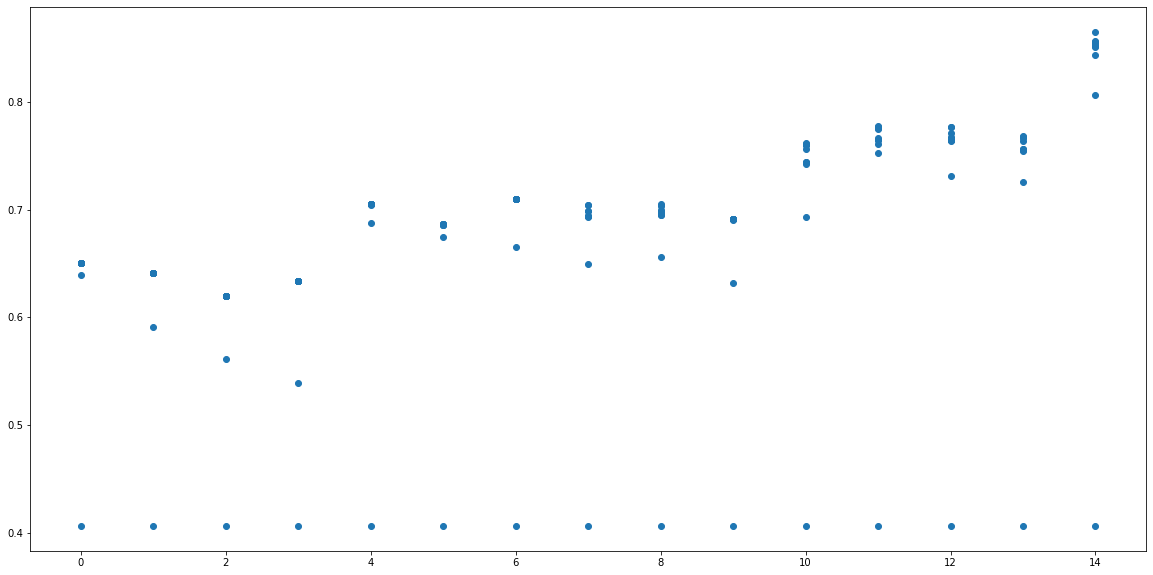

In [5]:
#scatter plot accuracy by clump
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(qtrs['Clump'], qtrs['accuracy'])

In [6]:
# worst estimator - AdaBoost
qtrs.groupby('Clump')['accuracy','Estimator'].min()

<ipython-input-6-748608c89bb8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qtrs.groupby('Clump')['accuracy','Estimator'].min()


,accuracy,Estimator
Clump,,
0,0.406461,AdaBoostClassifier
1,0.406461,AdaBoostClassifier
2,0.406461,AdaBoostClassifier
3,0.406461,AdaBoostClassifier
4,0.406461,AdaBoostClassifier
5,0.406461,AdaBoostClassifier
6,0.406461,AdaBoostClassifier
7,0.406461,AdaBoostClassifier
8,0.406461,AdaBoostClassifier


In [7]:
qtrs.groupby('Clump')['accuracy','Estimator'].max()
# best estimator - RandomForestClassifier

<ipython-input-7-3df2951ebf4e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qtrs.groupby('Clump')['accuracy','Estimator'].max()


,accuracy,Estimator
Clump,,
0,0.650639,RandomForestClassifier
1,0.640872,RandomForestClassifier
2,0.619835,RandomForestClassifier
3,0.633358,RandomForestClassifier
4,0.705485,RandomForestClassifier
5,0.686702,RandomForestClassifier
6,0.709992,RandomForestClassifier
7,0.703982,RandomForestClassifier
8,0.705485,RandomForestClassifier


In [8]:
# mean accuracy scores by clump
qtrs.groupby('Clump')['accuracy'].mean()

Clump
0     0.625094
1     0.612472
2     0.592637
3     0.601277
4     0.673178
5     0.657250
6     0.675131
7     0.663636
8     0.665440
9     0.656724
10    0.712998
11    0.732081
12    0.728700
13    0.721938
14    0.804207
Name: accuracy, dtype: float64

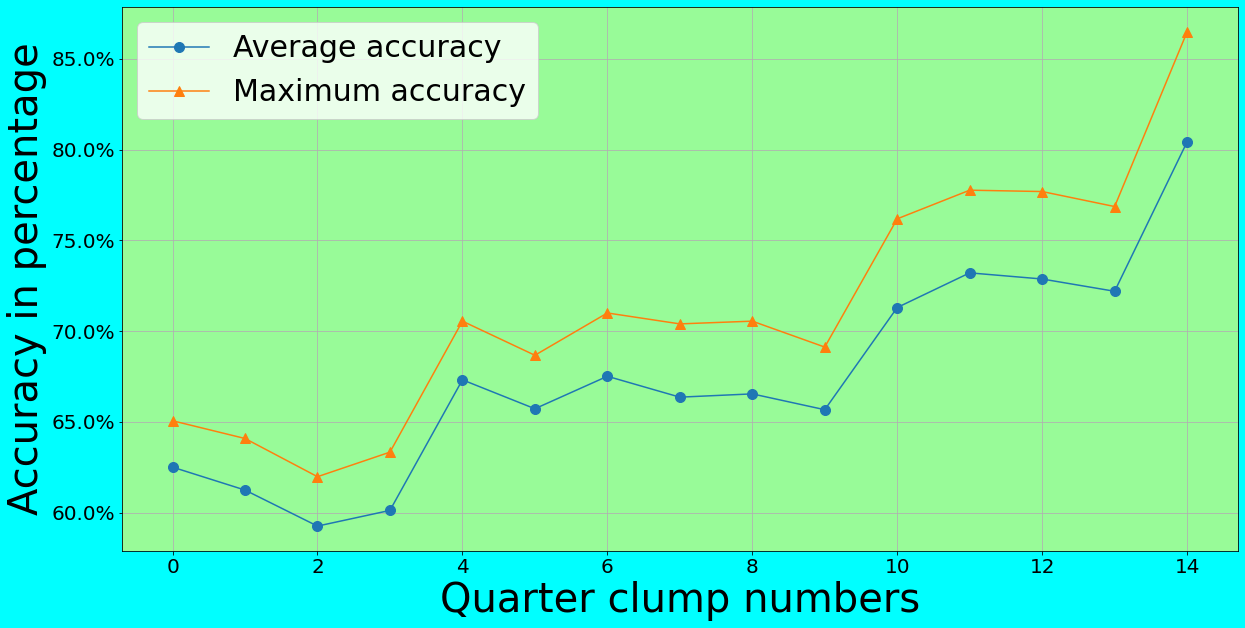

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(qtrs['Clump'].unique(), qtrs.groupby('Clump')['accuracy'].mean(), label = "Average accuracy",marker='o',
        markersize=10)#Rforest
plt.plot(qtrs['Clump'].unique(), qtrs.groupby('Clump')['accuracy'].max(), label = "Maximum accuracy", marker='^',
        markersize=10)
plt.xlabel("Quarter clump numbers", fontsize=40)
plt.ylabel("Accuracy in percentage", fontsize=40)
plt.grid()
fig.patch.set_facecolor('aqua')
ax.set_facecolor('palegreen')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
        #https://www.pauldesalvo.com/convert-y-axis-labels-to-a-percentage-in-python-matplotlib/
plt.legend(fontsize=30)

In [10]:
#load in weekly data
weekly = pd.read_csv('data/Weekly_Quarter_Combos_Modeling_Results.csv')
weekly

,Unnamed: 0,Week,Clump,Estimator,params,accuracy
0,0,1,0,LogisticRegression,NaN,0.612500
1,1,1,1,LogisticRegression,NaN,0.675000
2,2,1,2,LogisticRegression,NaN,0.762500
3,3,1,3,LogisticRegression,NaN,0.637500
4,4,1,4,LogisticRegression,NaN,0.687500
5,5,1,5,LogisticRegression,NaN,0.775000
6,6,1,6,LogisticRegression,NaN,0.762500
7,7,1,7,LogisticRegression,NaN,0.775000
8,8,1,8,LogisticRegression,NaN,0.662500
9,9,1,9,LogisticRegression,NaN,0.725000


In [11]:
x = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].max()
x

<ipython-input-11-2f31cf3c9ceb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].max()


accuracy               Estimator
Week Clump                                  
1    0      0.650000  RandomForestClassifier
     1      0.675000  RandomForestClassifier
     2      0.762500  RandomForestClassifier
     3      0.637500  RandomForestClassifier
     4      0.700000  RandomForestClassifier
     5      0.787500  RandomForestClassifier
     6      0.762500  RandomForestClassifier
     7      0.787500  RandomForestClassifier
     8      0.687500  RandomForestClassifier
     9      0.737500  RandomForestClassifier
     10     0.800000  RandomForestClassifier
     11     0.787500  RandomForestClassifier
     12     0.762500  RandomForestClassifier
     13     0.837500  RandomForestClassifier
     14     0.875000  RandomForestClassifier
10   0      0.666667  RandomForestClassifier
     1      0.638889  RandomForestClassifier
     2      0.583333  RandomForestClassifier
     3      0.625000  RandomForestClassifier
     4      0.722222  RandomForestClassifier
     5      0.708333  RandomForestClassifier
     6      0.680556  RandomForestClassifier
     7      0.722222  RandomForestClassifier
     8      0.736111  RandomForestClassifier
     9      0.736111  RandomForestClassifier
     10     0.777778  RandomForestClassifier
     11     0.777778  RandomForestClassifier
     12     0.805556  RandomForestClassifier
     13     0.763889  RandomForestClassifier
     14     0.916667  RandomForestClassifier
11   0      0.693333  RandomForestClassifier
     1      0.706667  RandomForestClassifier
     2      0.693333  RandomForestClassifier
     3      0.600000  RandomForestClassifier
     4      0.800000  RandomForestClassifier
     5      0.826667  RandomForestClassifier
     6      0.733333  RandomForestClassifier
     7      0.773333  RandomForestClassifier
     8      0.786667  RandomForestClassifier
     9      0.760000  RandomForestClassifier
     10     0.853333  RandomForestClassifier
     11     0.826667  RandomForestClassifier
     12     0.853333  RandomForestClassifier
     13     0.786667  RandomForestClassifier
     14     0.906667  RandomForestClassifier
12   0      0.602564  RandomForestClassifier
     1      0.564103  RandomForestClassifier
     2      0.666667  RandomForestClassifier
     3      0.589744  RandomForestClassifier
     4      0.705128  RandomForestClassifier
     5      0.756410  RandomForestClassifier
     6      0.756410  RandomForestClassifier
     7      0.666667  RandomForestClassifier
     8      0.628205  RandomForestClassifier
     9      0.679487  RandomForestClassifier
     10     0.756410  RandomForestClassifier
     11     0.730769  RandomForestClassifier
     12     0.743590  RandomForestClassifier
     13     0.807692  RandomForestClassifier
     14     0.833333  RandomForestClassifier
13   0      0.587500  RandomForestClassifier
     1      0.762500  RandomForestClassifier
     2      0.612500  RandomForestClassifier
     3      0.675000  RandomForestClassifier
     4      0.775000  RandomForestClassifier
     5      0.787500  RandomForestClassifier
     6      0.712500  RandomForestClassifier
     7      0.687500  RandomForestClassifier
     8      0.687500  RandomForestClassifier
     9      0.825000  RandomForestClassifier
     10     0.800000  RandomForestClassifier
     11     0.737500  RandomForestClassifier
     12     0.825000  RandomForestClassifier
     13     0.837500  RandomForestClassifier
     14     0.812500  RandomForestClassifier
14   0      0.687500  RandomForestClassifier
     1      0.762500  RandomForestClassifier
     2      0.612500  RandomForestClassifier
     3      0.637500  RandomForestClassifier
     4      0.775000  RandomForestClassifier
     5      0.837500  RandomForestClassifier
     6      0.650000  RandomForestClassifier
     7      0.775000  RandomForestClassifier
     8      0.737500  RandomForestClassifier
     9      0.787500  RandomForestClassifier
     10     0.825000  RandomForestClassifier
     11     0.775000  RandomForestClassifier
     12

In [12]:
x = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].max()
x['Estimator'].unique()

<ipython-input-12-c0ace9de6ef0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].max()


array(['RandomForestClassifier'], dtype=object)

In [13]:
weekly.groupby(['Week','Clump'])['accuracy','Estimator'].min()

<ipython-input-13-155cb3e73489>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly.groupby(['Week','Clump'])['accuracy','Estimator'].min()


accuracy           Estimator
Week Clump                              
1    0      0.612500  AdaBoostClassifier
     1      0.675000  AdaBoostClassifier
     2      0.587500  AdaBoostClassifier
     3      0.600000  AdaBoostClassifier
     4      0.637500  AdaBoostClassifier
     5      0.712500  AdaBoostClassifier
     6      0.725000  AdaBoostClassifier
     7      0.725000  AdaBoostClassifier
     8      0.612500  AdaBoostClassifier
     9      0.537500  AdaBoostClassifier
     10     0.700000  AdaBoostClassifier
     11     0.675000  AdaBoostClassifier
     12     0.712500  AdaBoostClassifier
     13     0.787500  AdaBoostClassifier
     14     0.725000  AdaBoostClassifier
10   0      0.513889  AdaBoostClassifier
     1      0.541667  AdaBoostClassifier
     2      0.569444  AdaBoostClassifier
     3      0.569444  AdaBoostClassifier
     4      0.625000  AdaBoostClassifier
     5      0.583333  AdaBoostClassifier
     6      0.638889  AdaBoostClassifier
     7      0.597222  AdaBoostClassifier
     8      0.625000  AdaBoostClassifier
     9      0.652778  AdaBoostClassifier
     10     0.597222  AdaBoostClassifier
     11     0.680556  AdaBoostClassifier
     12     0.638889  AdaBoostClassifier
     13     0.652778  AdaBoostClassifier
     14     0.666667  AdaBoostClassifier
11   0      0.453333  AdaBoostClassifier
     1      0.706667  AdaBoostClassifier
     2      0.640000  AdaBoostClassifier
     3      0.586667  AdaBoostClassifier
     4      0.706667  AdaBoostClassifier
     5      0.760000  AdaBoostClassifier
     6      0.720000  AdaBoostClassifier
     7      0.720000  AdaBoostClassifier
     8      0.613333  AdaBoostClassifier
     9      0.693333  AdaBoostClassifier
     10     0.773333  AdaBoostClassifier
     11     0.733333  AdaBoostClassifier
     12     0.733333  AdaBoostClassifier
     13     0.680000  AdaBoostClassifier
     14     0.733333  AdaBoostClassifier
12   0      0.358974  AdaBoostClassifier
     1      0.551282  AdaBoostClassifier
     2      0.628205  AdaBoostClassifier
     3      0.589744  AdaBoostClassifier
     4      0.500000  AdaBoostClassifier
     5      0.615385  AdaBoostClassifier
     6      0.717949  AdaBoostClassifier
     7      0.589744  AdaBoostClassifier
     8      0.423077  AdaBoostClassifier
     9      0.564103  AdaBoostClassifier
     10     0.641026  AdaBoostClassifier
     11     0.653846  AdaBoostClassifier
     12     0.525641  AdaBoostClassifier
     13     0.653846  AdaBoostClassifier
     14     0.679487  AdaBoostClassifier
13   0      0.475000  AdaBoostClassifier
     1      0.762500  AdaBoostClassifier
     2      0.450000  AdaBoostClassifier
     3      0.675000  AdaBoostClassifier
     4      0.600000  AdaBoostClassifier
     5      0.712500  AdaBoostClassifier
     6      0.700000  AdaBoostClassifier
     7      0.462500  AdaBoostClassifier
     8      0.625000  AdaBoostClassifier
     9      0.750000  AdaBoostClassifier
     10     0.662500  AdaBoostClassifier
     11     0.587500  AdaBoostClassifier
     12     0.675000  AdaBoostClassifier
     13     0.725000  AdaBoostClassifier
     14     0.725000  AdaBoostClassifier
14   0      0.612500  AdaBoostClassifier
     1      0.712500  AdaBoostClassifier
     2      0.600000  AdaBoostClassifier
     3      0.637500  AdaBoostClassifier
     4      0.700000  AdaBoostClassifier
     5      0.687500  AdaBoostClassifier
     6      0.600000  AdaBoostClassifier
     7      0.625000  AdaBoostClassifier
     8      0.612500  AdaBoostClassifier
     9      0.712500  AdaBoostClassifier
     10     0.662500  AdaBoostClassifier
     11     0.637500  AdaBoostClassifier
     12     0.700000  AdaBoostClassifier
     13     0.662500  AdaBoostClassifier
     14     0.687500  AdaBoostClassifier
15   0      0.662500  AdaBoostClassifier
     1      0.625000  AdaBoostClassifier
     2      0.600000  AdaBoostClassifier
     3      0.537500  AdaBoostClassifier
     4      0.662500  AdaBoostClassifier
     5      0.625000  AdaBoostClass

In [14]:
y = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].min()
y['Estimator'].unique()

<ipython-input-14-1bcbbabe367a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = weekly.groupby(['Week','Clump'])['accuracy','Estimator'].min()


array(['AdaBoostClassifier'], dtype=object)

In [15]:
weekly_1 = weekly[weekly['Week'] == '1']
weekly_1.groupby('Clump')['accuracy'].mean()

Clump
0     0.616667
1     0.675000
2     0.743056
3     0.633333
4     0.661111
5     0.762500
6     0.751389
7     0.752778
8     0.647222
9     0.690278
10    0.755556
11    0.723611
12    0.730556
13    0.811111
14    0.816667
Name: accuracy, dtype: float64

In [16]:
weekly_2 = weekly[weekly['Week'] == '2']
weekly_2.groupby('Clump')['accuracy'].mean()

Clump
0     0.646976
1     0.576653
2     0.670886
3     0.613221
4     0.648383
5     0.658228
6     0.654008
7     0.618847
8     0.649789
9     0.683544
10    0.691983
11    0.744023
12    0.697609
13    0.742616
14    0.756681
Name: accuracy, dtype: float64

In [17]:
weekly_3 = weekly[weekly['Week'] == '3']
weekly_3.groupby('Clump')['accuracy'].mean()

Clump
0     0.578644
1     0.630592
2     0.619048
3     0.610390
4     0.663781
5     0.679654
6     0.720058
7     0.715729
8     0.669553
9     0.653680
10    0.715729
11    0.686869
12    0.730159
13    0.711400
14    0.750361
Name: accuracy, dtype: float64

In [18]:
# to make x axis with consecutive weeks, change string values to integers using a dictionary
week_dict = {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10,
            '11':11, '12':12, '13':13, '14':14, '15':15, '16':16, '17': 17, 'WC': 18, 'DV': 19, 'CC':20, 'SB':21}

weekly_C0 = weekly[weekly['Clump'] == 0]
weekly_C0['week_int'] = weekly_C0['Week'].map(week_dict)


<ipython-input-18-8ff99f425b85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_C0['week_int'] = weekly_C0['Week'].map(week_dict)


In [19]:
# mean of all weeks of 1st qtr clump
C0 = weekly.groupby(['Clump','Week',])['accuracy','Estimator'].mean()
C0
C0.iloc[:20,0].mean()

<ipython-input-19-55dd7fe0c1ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  C0 = weekly.groupby(['Clump','Week',])['accuracy','Estimator'].mean()


0.6134326738123723

In [20]:
# also did this with 2nd qtr clump
C0.iloc[21:42,0].mean()

0.6227547063671336

In [21]:
# also did this with 3rd qtr clump
C0.iloc[42:63,0].mean()

0.62357217981542

In [22]:
# also did this with 4th qtr clump
C0.iloc[63:84,0].mean()

0.5930753255083512

In [23]:
#... and all qtrs clump
C0.iloc[-21:,0].mean()

0.7425631767654368

In [24]:
weekly_C0 = weekly[weekly['Clump'] == 0]
weekly_C0['week_int'] = weekly_C0['Week'].map(week_dict)
weekly_C0

<ipython-input-24-a9a68a324881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_C0['week_int'] = weekly_C0['Week'].map(week_dict)


,Unnamed: 0,Week,Clump,Estimator,params,accuracy,week_int
0,0,1,0,LogisticRegression,NaN,0.612500,1
15,15,2,0,LogisticRegression,NaN,0.645570,2
30,30,3,0,LogisticRegression,NaN,0.571429,3
45,45,4,0,LogisticRegression,NaN,0.657534,4
60,60,5,0,LogisticRegression,NaN,0.563380,5
75,75,6,0,LogisticRegression,NaN,0.471429,6
90,90,7,0,LogisticRegression,NaN,0.785714,7
105,105,8,0,LogisticRegression,NaN,0.724638,8
120,120,9,0,LogisticRegression,NaN,0.608696,9
135,135,10,0,LogisticRegression,NaN,0.625000,10


In [25]:
weekly_C1 = weekly[weekly['Clump'] == 1]
weekly_C1['week_int'] = weekly_C1['Week'].map(week_dict)
weekly_C1

<ipython-input-25-f774ff27777e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_C1['week_int'] = weekly_C1['Week'].map(week_dict)


,Unnamed: 0,Week,Clump,Estimator,params,accuracy,week_int
1,1,1,1,LogisticRegression,NaN,0.675000,1
16,16,2,1,LogisticRegression,NaN,0.569620,2
31,31,3,1,LogisticRegression,NaN,0.636364,3
46,46,4,1,LogisticRegression,NaN,0.671233,4
61,61,5,1,LogisticRegression,NaN,0.704225,5
76,76,6,1,LogisticRegression,NaN,0.614286,6
91,91,7,1,LogisticRegression,NaN,0.671429,7
106,106,8,1,LogisticRegression,NaN,0.623188,8
121,121,9,1,LogisticRegression,NaN,0.550725,9
136,136,10,1,LogisticRegression,NaN,0.638889,10


In [26]:
weekly_C2 = weekly[weekly['Clump'] == 2]
weekly_C2['week_int'] = weekly_C2['Week'].map(week_dict)

<ipython-input-26-7c14d629317d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_C2['week_int'] = weekly_C2['Week'].map(week_dict)


In [27]:
weekly_C3 = weekly[weekly['Clump'] == 3]
weekly_C3['week_int'] = weekly_C3['Week'].map(week_dict)

<ipython-input-27-2a28b1ae8dc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_C3['week_int'] = weekly_C3['Week'].map(week_dict)


In [28]:
#make null model for graphing
week_null = np.zeros((1,21))
week_null  = week_null  + 0.536251
week_null.T

array([[0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251]])

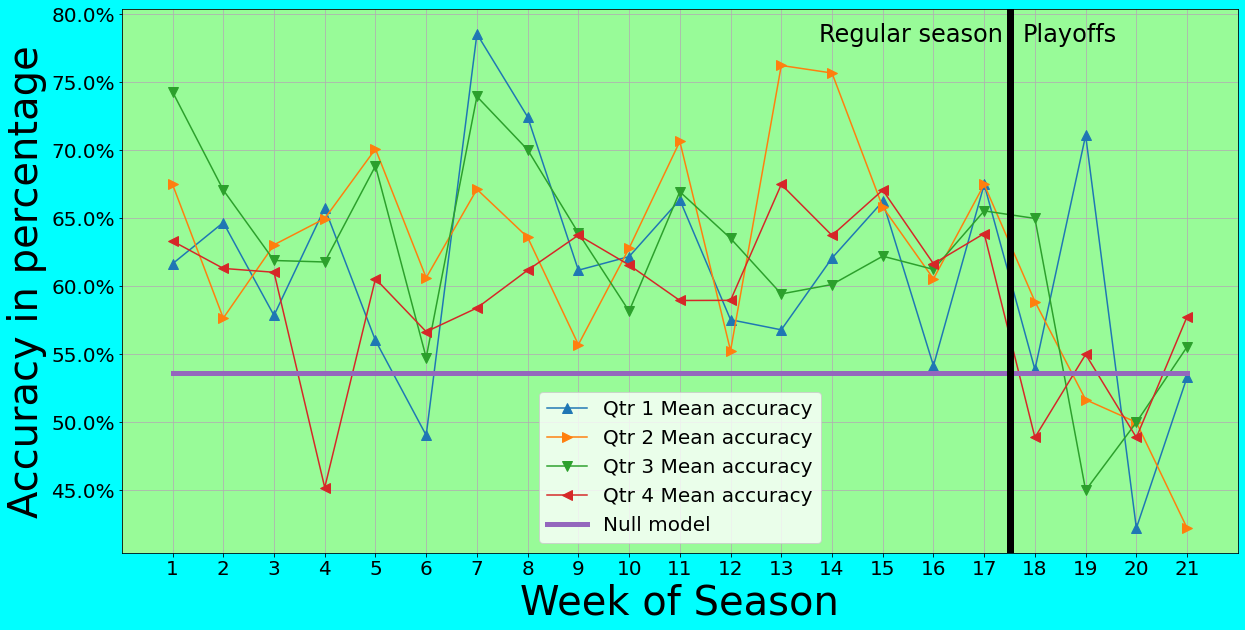

In [29]:
# plot - quarterly accuracy scores by week
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(weekly_C0['week_int'].unique(), weekly_C0.groupby('week_int')['accuracy'].mean(), label = "Qtr 1 Mean accuracy", marker='^',
        markersize=10)
plt.plot(weekly_C1['week_int'].unique(), weekly_C1.groupby('week_int')['accuracy'].mean(), label = "Qtr 2 Mean accuracy", marker='>',
        markersize=10)
plt.plot(weekly_C2['week_int'].unique(), weekly_C2.groupby('week_int')['accuracy'].mean(), label = "Qtr 3 Mean accuracy", marker='v',
        markersize=10)
plt.plot(weekly_C3['week_int'].unique(), weekly_C3.groupby('week_int')['accuracy'].mean(), label = "Qtr 4 Mean accuracy", marker='<',
        markersize=10)
plt.plot(weekly_C3['week_int'].unique(), week_null.T, linewidth=5, label="Null model")
plt.axvline(x=17.5,linewidth=7, color='black')
plt.xlabel("Week of Season", fontsize=40)
plt.xticks(np.arange(1, 22, step=1))
plt.ylabel("Accuracy in percentage", fontsize=40)
plt.grid()
fig.patch.set_facecolor('aqua')
ax.set_facecolor('palegreen')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
        #https://www.pauldesalvo.com/convert-y-axis-labels-to-a-percentage-in-python-matplotlib/
ax.text(13.75, .78, 'Regular season', fontsize=24)
ax.text(17.75, .78, 'Playoffs', fontsize=24)
plt.legend(loc=8, fontsize=20);


In [30]:
yearly = pd.read_csv('data/Yearly_Quarter_Combos_Modeling_Results.csv')
yearly

,Unnamed: 0,Year,Clump,Estimator,params,accuracy
0,0,2000,0,LogisticRegression,NaN,0.634921
1,1,2000,1,LogisticRegression,NaN,0.634921
2,2,2000,2,LogisticRegression,NaN,0.603175
3,3,2000,3,LogisticRegression,NaN,0.666667
4,4,2000,4,LogisticRegression,NaN,0.714286
5,5,2000,5,LogisticRegression,NaN,0.619048
6,6,2000,6,LogisticRegression,NaN,0.650794
7,7,2000,7,LogisticRegression,NaN,0.587302
8,8,2000,8,LogisticRegression,NaN,0.666667
9,9,2000,9,LogisticRegression,NaN,0.714286


In [33]:
yearly.groupby(['Year'])['accuracy','Estimator'].mean()

<ipython-input-33-62f289c28203>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly.groupby(['Year'])['accuracy','Estimator'].mean()


,accuracy
Year,
2000,0.672663
2001,0.659012
2002,0.639750
2003,0.676285
2004,0.663139
2005,0.634641
2006,0.718310
2007,0.658154
2008,0.678275


In [34]:
yearly_C0 = yearly[yearly['Clump'] == 0]
yearly_C0

,Unnamed: 0,Year,Clump,Estimator,params,accuracy
0,0,2000,0,LogisticRegression,NaN,0.634921
15,15,2001,0,LogisticRegression,NaN,0.633333
30,30,2002,0,LogisticRegression,NaN,0.690141
45,45,2003,0,LogisticRegression,NaN,0.656716
60,60,2004,0,LogisticRegression,NaN,0.619048
75,75,2005,0,LogisticRegression,NaN,0.617647
90,90,2006,0,LogisticRegression,NaN,0.746479
105,105,2007,0,LogisticRegression,NaN,0.582090
120,120,2008,0,LogisticRegression,NaN,0.552239
135,135,2009,0,LogisticRegression,NaN,0.650794


In [35]:
yearly_C1 = yearly[yearly['Clump'] == 1]

In [36]:
yearly_C2 = yearly[yearly['Clump'] == 2]

In [37]:
yearly_C3 = yearly[yearly['Clump'] == 3]

In [38]:
x = np.zeros((1,20))
null = x + 0.536251
null.T

array([[0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251],
       [0.536251]])

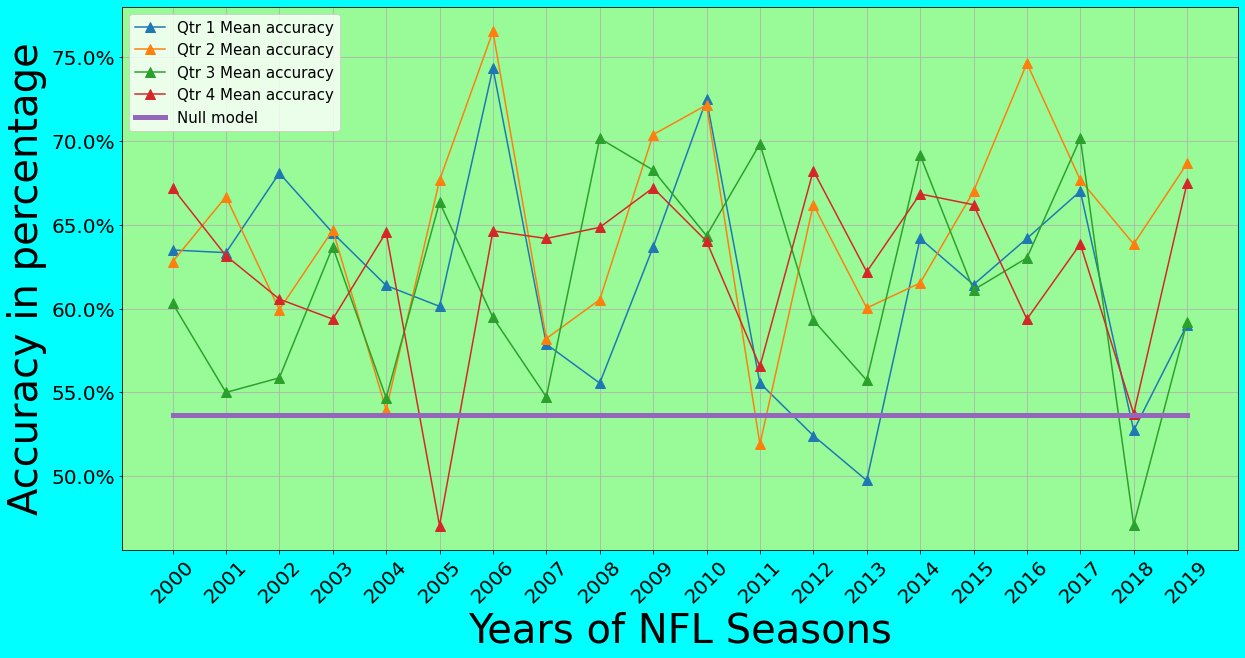

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(yearly_C0['Year'].unique(), yearly_C0.groupby(['Year'])['accuracy'].mean(), label = "Qtr 1 Mean accuracy", marker='^',
        markersize=10)
plt.plot(yearly_C1['Year'].unique(), yearly_C1.groupby(['Year'])['accuracy'].mean(), label = "Qtr 2 Mean accuracy", marker='^',
        markersize=10)
plt.plot(yearly_C2['Year'].unique(), yearly_C2.groupby(['Year'])['accuracy'].mean(), label = "Qtr 3 Mean accuracy", marker='^',
        markersize=10)
plt.plot(yearly_C3['Year'].unique(), yearly_C3.groupby(['Year'])['accuracy'].mean(), label = "Qtr 4 Mean accuracy", marker='^',
        markersize=10)
plt.plot(yearly_C2['Year'].unique(), null.T, linewidth=5, label="Null model")
plt.xlabel("Years of NFL Seasons", fontsize=40)
plt.xticks(np.arange(2000, 2020, step=1), rotation = 45)
plt.ylabel("Accuracy in percentage", fontsize=40)
plt.grid()
fig.patch.set_facecolor('aqua')
ax.set_facecolor('palegreen')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
        #https://www.pauldesalvo.com/convert-y-axis-labels-to-a-percentage-in-python-matplotlib/
plt.legend(loc=2, fontsize=15)

In [40]:
x = yearly.groupby(['Year','Clump'])['accuracy','Estimator'].max()
x['Estimator'].unique()

<ipython-input-40-28fae5fdd774>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = yearly.groupby(['Year','Clump'])['accuracy','Estimator'].max()


array(['RandomForestClassifier'], dtype=object)

In [41]:
yearly.groupby(['Year','Clump'])['accuracy','Estimator'].min()

<ipython-input-41-422403f369e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly.groupby(['Year','Clump'])['accuracy','Estimator'].min()


accuracy           Estimator
Year Clump                              
2000 0      0.634921  AdaBoostClassifier
     1      0.571429  AdaBoostClassifier
     2      0.603175  AdaBoostClassifier
     3      0.666667  AdaBoostClassifier
     4      0.619048  AdaBoostClassifier
     5      0.603175  AdaBoostClassifier
     6      0.619048  AdaBoostClassifier
     7      0.587302  AdaBoostClassifier
     8      0.634921  AdaBoostClassifier
     9      0.666667  AdaBoostClassifier
     10     0.603175  AdaBoostClassifier
     11     0.666667  AdaBoostClassifier
     12     0.698413  AdaBoostClassifier
     13     0.666667  AdaBoostClassifier
     14     0.650794  AdaBoostClassifier
2001 0      0.633333  AdaBoostClassifier
     1      0.666667  AdaBoostClassifier
     2      0.550000  AdaBoostClassifier
     3      0.483333  AdaBoostClassifier
     4      0.650000  AdaBoostClassifier
     5      0.516667  AdaBoostClassifier
     6      0.500000  AdaBoostClassifier
     7      0.650000  AdaBoostClassifier
     8      0.533333  AdaBoostClassifier
     9      0.616667  AdaBoostClassifier
     10     0.666667  AdaBoostClassifier
     11     0.650000  AdaBoostClassifier
     12     0.616667  AdaBoostClassifier
     13     0.516667  AdaBoostClassifier
     14     0.566667  AdaBoostClassifier
2002 0      0.605634  AdaBoostClassifier
     1      0.436620  AdaBoostClassifier
     2      0.521127  AdaBoostClassifier
     3      0.605634  AdaBoostClassifier
     4      0.647887  AdaBoostClassifier
     5      0.605634  AdaBoostClassifier
     6      0.492958  AdaBoostClassifier
     7      0.535211  AdaBoostClassifier
     8      0.633803  AdaBoostClassifier
     9      0.492958  AdaBoostClassifier
     10     0.633803  AdaBoostClassifier
     11     0.535211  AdaBoostClassifier
     12     0.507042  AdaBoostClassifier
     13     0.549296  AdaBoostClassifier
     14     0.619718  AdaBoostClassifier
2003 0      0.552239  AdaBoostClassifier
     1      0.552239  AdaBoostClassifier
     2      0.597015  AdaBoostClassifier
     3      0.582090  AdaBoostClassifier
     4      0.716418  AdaBoostClassifier
     5      0.582090  AdaBoostClassifier
     6      0.552239  AdaBoostClassifier
     7      0.656716  AdaBoostClassifier
     8      0.656716  AdaBoostClassifier
     9      0.597015  AdaBoostClassifier
     10     0.611940  AdaBoostClassifier
     11     0.671642  AdaBoostClassifier
     12     0.641791  AdaBoostClassifier
     13     0.641791  AdaBoostClassifier
     14     0.671642  AdaBoostClassifier
2004 0      0.571429  AdaBoostClassifier
     1      0.460317  AdaBoostClassifier
     2      0.539683  AdaBoostClassifier
     3      0.603175  AdaBoostClassifier
     4      0.603175  AdaBoostClassifier
     5      0.619048  AdaBoostClassifier
     6      0.619048  AdaBoostClassifier
     7      0.492063  AdaBoostClassifier
     8      0.682540  AdaBoostClassifier
     9      0.619048  AdaBoostClassifier
     10     0.650794  AdaBoostClassifier
     11     0.666667  AdaBoostClassifier
     12     0.666667  AdaBoostClassifier
     13     0.571429  AdaBoostClassifier
     14     0.698413  AdaBoostClassifier
2005 0      0.470588  AdaBoostClassifier
     1      0.676471  AdaBoostClassifier
     2      0.661765  AdaBoostClassifier
     3      0.470588  AdaBoostClassifier
     4      0.632353  AdaBoostClassifier
     5      0.617647  AdaBoostClassifier
     6      0.588235  AdaBoostClassifier
     7      0.558824  AdaBoostClassifier
     8      0.529412  AdaBoostClassifier
     9      0.632353  AdaBoostClassifier
     10     0.588235  AdaBoostClassifier
     11     0.514706  AdaBoostClassifier
     12     0.558824  AdaBoostClassifier
     13     0.647059  AdaBoostClassifier
     14     0.661765  AdaBoostClassifier
2006 0      0.718310  AdaBoostClassifier
     1      0.690141  AdaBoostClassifier
     2      0.591549  AdaBoostClassifier
     3      0.633803  AdaBoostClassifier
     4      0.760563  AdaBoostClassifier
     5      0.591549  AdaBoostClass